$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 1** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Maximum likelihood estimation (MLE), Maximum a posteriori (MAP)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 16/4** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Hai Dinh, 19960331-4494, hasy@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Christopher Meszaros, 19930707-2778,  meszaros@student.chalmers.se** <br />

# Theoretical problems

## [Maximum likelihood estimator (MLE), 4 points]

Consider a dataset $x_1, \ldots, x_n$ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p$ identity matrix, and $\sigma^2$ is a
scalar. Derive the maximum likelihood estimator for $\sigma$.

### Answer

<br>Our covariance matrix $(\Sigma)$ for the Gaussian distribution above is:
$$ \begin{matrix} \Sigma = \sigma^2I &&
                         |\Sigma| = \sigma^{2p}&&
                         \Sigma^{-1} = \dfrac{1}{\sigma^2}I \end{matrix} $$

Plugging the covariance into the multivariate-Gaussian distribution formula from the lecture slides ([3a](http://www.cse.chalmers.se/research/lab/mlcourse/lecture3a_2018.pdf)), we get distribution for some vector $\mathbf{x}_i \in \mathbb{R}^p$:
$$ N(\mu,\sigma^2I) = \dfrac{1}{(2\pi)^{p/2}\sigma^p} \exp 
                      \left( -\dfrac{1}{2\sigma^2}(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) \right) $$
$$ \Leftrightarrow \log N(\mu,\sigma^2I) = -\log ((2\pi)^{p/2}) - \log(\sigma^p)
                                           -\dfrac{1}{2\sigma^2}(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) $$

Partially differentiating the log of the distribution with respect to $\mu$ gives:
$$ \dfrac{\partial}{\partial\mu}\log N(\mu,\sigma^2I) = \dfrac{1}{\sigma^2}(\mathbf{x}_i-\mu) $$

And the partial derivative of the log distribution with respect to $\sigma$ gives:
$$ \dfrac{\partial}{\partial\sigma}\log N(\mu,\sigma^2I) = -\dfrac{p}{\sigma} + \dfrac{1}{\sigma^3}(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) $$

Since the observations are sampled independently from one another, we are allowed to multiply their distribution in order to get the likelihood $L$:
$$ L = \prod_{i=1}^n N(\mu,\sigma^2I) \Leftrightarrow \log L = \sum_{i=1}^n \log N(\mu,\sigma^2I)$$

To get the parameter $\mu$ that gives the maximum likelihood, we simply differentiate the log of the likelihood with respect to $\mu$, and then set the derivative to $0$:
$$ 0 = \dfrac{\partial\log L}{\partial\mu} 
     = \sum_{i=1}^n \dfrac{\partial}{\partial\mu} \log N(\mu,\sigma^2I)
     = \sum_{i=1}^n \dfrac{1}{\sigma^2}(\mathbf{x}_i-\mu) 
     = \sum_{i=1}^n(\mathbf{x}_i-\mu) 
     = \sum_{i=1}^n\mathbf{x}_i - n\mu $$
$$ \Leftrightarrow \mu = \dfrac{1}{n}\sum_{i=1}^n\mathbf{x}_i $$

We do the same thing to get the estimate for $\sigma$:
$$ 0 = \dfrac{\partial\log L}{\partial\sigma} 
     = \sum_{i=1}^n \dfrac{\partial}{\partial\sigma} \log N(\mu,\sigma^2I)
     = -\dfrac{np}{\sigma} + \dfrac{1}{\sigma^3}\sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) $$
$$ \Leftrightarrow \sigma = \sqrt{\dfrac{1}{np}\sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu)} $$




## [Posterior distributions, 6 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. 
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

1. Derive the posterior distribution $p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha, \beta)$. (HINT: inverse-gamma distribution is conjugate prior to spherical Gaussian distribution when mean is known).

2. Assume $\mu$ is known and consider two separate models (having different parameters)

    * $\alpha =1$ and $\beta=1$ (Model $M_{A}$)
    * $\alpha = 10$ and $\beta= 1$ (Model $M_{B}$) 

Compute analytically the expression for the MAP estimate for both models in terms of posterior parameters referred to as $\alpha_{1}, \beta_{1}$.

### Answer

<br>Since inverse-gamma distribution is a conjugate prior to spherical Gaussian distribution when the mean $\mu$ is known, so assuming that $\mu$ is known, then the posterior distribution must be of the same type as the prior distribution. In other words, the posterior must be an inverse-gamma distribution with 2 unknown parameters $\alpha_1$ and $\beta_1$. This distribution can be written as:
<br>$$ P(\sigma^{2} = s | \mathbf{x}_1, \ldots, \mathbf{x}_n) =
       \dfrac{{\beta_1}^{\alpha_1}}{\Gamma(\alpha_1)} s^{-\alpha_1-1} \exp
       \left( -\dfrac{\beta_1}{s}\right) \tag{1}$$
<br>$$ \Leftrightarrow P(\sigma^{2} = s | \mathbf{x}_1, \ldots, \mathbf{x}_n)
       \propto \bigg\{s^{-\alpha_1-1} \exp \left( -\dfrac{\beta_1}{s}\right) \bigg\} \tag{2}$$

<br>The task now is to compute the unknown parameters $\alpha_1$ and $\beta_1$. To do this, we first define the **likelihood** as the product of the probability distributions of all the data points. We are allowed to multiply the probability density because the data points are generated independently from one another. So the formula for the likelihood is:
<br> $$ P(\mathbf{x}_1, \ldots, \mathbf{x}_n | \sigma^{2}) = 
        \prod_{i=1}^n P(X = \mathbf{x}_i | \sigma^{2}) =
        \left( \dfrac{1}{2\pi\sigma^2}\right)^n \exp 
        \left(-\dfrac{1}{2\sigma^2}\sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) \right) \tag{3} $$

<br>According to the Bayes' rule, the product of the likelihood and the prior is proportional to the posterior:
<br>$$ P(\sigma^{2} = s | \mathbf{x}_1, \ldots, \mathbf{x}_n) 
       \propto \bigg\{ P(\mathbf{x}_1, \ldots, \mathbf{x}_n | \sigma^{2}) P(\sigma^{2} = s | \alpha, \beta) \bigg\}
       \propto \bigg\{ \dfrac{1}{\sigma^{2n}}s^{-\alpha-1} 
                       \exp \left(-\dfrac{1}{2\sigma^2}\sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) \right)
                       \exp \left(-\dfrac{\beta}{s}\right) \bigg\} $$
<br>$$ \Leftrightarrow P(\sigma^{2} = s | \mathbf{x}_1, \ldots, \mathbf{x}_n)
       \propto \bigg\{s^{-\alpha-1-n} \exp 
       \left(-\dfrac{1}{2s}\sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) -\dfrac{\beta}{s} \right) \bigg\} \tag{4} $$

<br>From equations (2) and (4), we can see that whatever inside the exponents should be the same, and whatever outside the exponents should also be the same. Equating the outside of the exponents, we get:
<br>$$ s^{-\alpha_1-1} = s^{-\alpha-1-n} \Leftrightarrow -\alpha_1-1 = -\alpha-1-n $$
<br>$$ \Leftrightarrow \alpha_1 = \alpha + n \tag{5} $$

<br>Equating the inside of the exponents, we get:
<br>$$ -\dfrac{\beta_1}{s} = -\dfrac{1}{2s}\sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) -\dfrac{\beta}{s} $$
<br>$$ \Leftrightarrow \beta_1 = \beta + \dfrac{1}{2}\sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) \tag{6} $$

<br>To compute the MAP point estimate for $\sigma^2$, we take the log of the posterior distribution (in equation 1), and differentiate that with respect to $\sigma$ and then set the derivative to $0$:
<br>$$ \log P(\sigma^2 = s| \mathbf{x}_1,\ldots, \mathbf{x}_n) = 
       \log\left(\dfrac{{\beta_1}^{\alpha_1}}{\Gamma(\alpha_1)}\right) +
       \log\left(\sigma^{-2\alpha_1-2}\right) -
       \dfrac{\beta_1}{\sigma^2} $$
<br>$$ \Leftrightarrow 0 = 
       \dfrac{\partial}{\partial\sigma} \log P(\sigma^2 = s| \mathbf{x}_1,\ldots, \mathbf{x}_n) = 
       -\dfrac{2\alpha_1 + 2}{\sigma} + \dfrac{2\beta_1}{\sigma^3} $$
<br>$$ \Leftrightarrow \sigma^2 = \dfrac{\beta_1}{\alpha_1 + 1} =
       \dfrac{1}{2(\alpha+n+1)}\left( 2\beta + \sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) \right) \tag{7} $$
       
<br>From equation 7, it is clear that the variance will increase if $\beta$ increases. And the variance will decrease if $\alpha$ increases.
<br>For model $M_A$, we have:
<br>$$ \sigma^2 = \dfrac{1}{2(n+2)}\left( 2 + \sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) \right) \tag{8} $$

<br>For model $M_B$, we have:
<br>$$ \sigma^2 = \dfrac{1}{2(n+11)}\left( 2 + \sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) \right) \tag{9} $$


# Practical problems

**Useful python libraries/functions:**
* **General:**  shape, reshape, np.mean etc.
* **Plotting:** plot, scatter, legend, hold, imshow, subplot,
  grid, title etc.

## [Spherical Gaussian estimation, 5 points]

Consider a dataset consisting of i.i.d. observations
generated from a spherical Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p $ identity matrix, and $\sigma^2$ is a scalar.

(a) Write the mathematical expression for the MLE estimators for $\mu$ and $\sigma$ in above setup.

(b) Implement a function **sge()** that estimates the mean $\mu$ and variance $\sigma^{2}$ from the given data, using the skeleton code provided below. Note: You cannot use **numpy.cov** and **numpy.mean** or any other functions for calculating the mean and variance.

(c) Implement a function **myplot1()** which takes as input a two-dimensional dataset $x$ (as described above); and draws, on the same plot, the following:
1. A scatter plot of the original data $x$, 
2. Circles with center $\mu$ and radius $r=k \sigma$ for $k=1, 2, 3$ where $\mathbf{\mu}$ and $\sigma^{2}$ denote the mean and variance estimated using **sge()**. 
3. Legend for each circle indicating the fraction of points (in the original dataset) that lie outside the circle boundary.

(d) Load 'dataset0.txt' and run your code using only the first two features of the dataset. Submit the resulting plot as well as your implementation here.

### Answer

The MLE estimator for $\mu$ (taken from the answer in the 1st theoretical question) is: 
$$ \Leftrightarrow \mu = \dfrac{1}{n}\sum_{i=1}^n\mathbf{x}_i $$

The MLE estimator for $\sigma$ (also taken from the answer in the 1st theoretical question) is:
$$ \Leftrightarrow \sigma = \sqrt{\dfrac{1}{np}\sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu)} $$

To implement the function **sge()**, we just use these 2 formulae directly. We then use the result of this function to plot the 3 circles, as required by the assignment. The data points will also be scattered on the plot at the end. So our implementation is pretty straight-forward.


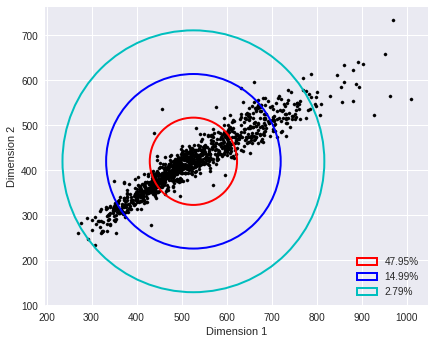

In [50]:
import numpy as np
from math import sqrt
from functools import reduce
import matplotlib.pyplot as plt


def sge(X):
    """
    SGE Mean and variance estimator for spherical Gaussian distribution.
    X: Data matrix of size n x p where each row represents a p-dimensional data point
    e.g. X = [ 2 1 ; 3 7 ; 4 5 ] is a dataset having 3 samples having two co−ordinates each.
    mu: Estimated mean o f the dataset [mu_1 mu_2 . . . mu_p]
    sigma: Estimated standard deviation of the dataset ( number )
    """
    n,p = X.shape
    mu = np.sum(X, axis=0) / n
    M = np.square(X - mu)
    sigma = sqrt(np.sum(M) / (n*p))
    return mu, sigma


def myplot1(data):
    ### Prepare the data frame, taking only the first 2 dimensions.
    X = data[:,0:2]
    n, p = X.shape
    mu, sigma = sge(X)

    ### Compute the Z-score (standardization) for each data point.
    Z = np.square(X - mu)
    Z = np.sum(Z, axis=1)
    Z = np.sqrt(Z) / sigma
    Z = np.floor(Z)

    ### Count the number of points outside each circle.
    k1 = reduce(lambda acc, z: acc+1 if z>0 else acc, Z) / n * 100
    k2 = reduce(lambda acc, z: acc+1 if z>1 else acc, Z) / n * 100
    k3 = reduce(lambda acc, z: acc+1 if z>2 else acc, Z) / n * 100
    
    ### Create the subplots and labels.
    fig, ax = plt.subplots()
    ax.set_aspect("equal")
    labels = ["{0:.2f}".format(k1) + "%",
              "{0:.2f}".format(k2) + "%",
              "{0:.2f}".format(k3) + "%"]

    ### Add the circles with the legends.
    circ1 = plt.Circle(tuple(mu), sigma, color="r", linewidth=2, fill=False)
    circ2 = plt.Circle(tuple(mu), 2*sigma, color="b", linewidth=2, fill=False)
    circ3 = plt.Circle(tuple(mu), 3*sigma, color="c", linewidth=2, fill=False)
    ax.add_patch(circ1); ax.add_patch(circ2); ax.add_patch(circ3)
    ax.legend([circ1, circ2, circ3], labels)

    ### Scatter the data points.
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.scatter(X[:,0], X[:,1], c="k", s=10)
    plt.show()


### Uncomment to download the file containing the data
#!pip install -q wget
#import wget
#wget.download("http://www.cse.chalmers.se/research/lab/mlcourse/hw0/dataset0.txt")

### Import the dataset and plot
data = np.loadtxt("./dataset0.txt")
myplot1(data)

## [MAP estimation, 5 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a multivariate normal distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. We will now explore the Bayesian approach to estimation of $\sigma^{2}$ *under the assumption that the mean $\mu$ is known.*
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

Assume that your dataset now consists of just the first two features of 'dataset0.txt'.

(a) Choose $\mu$ to be the empirical mean. Implement a function **myplot2()**, that on the same plot, shows the prior and posterior distributions for $\sigma$ with parameters $\alpha = 1 $ and $\beta = 1$.  Generate a second plot with $\alpha=10$ and $\beta=1$. What do you observe?

HINT:
   * Calculate the posterior distribution using the data and the formula that you derived in the theoretical question **"Posterior distributions"**.
   * You might want to check out the "log-sum-exp trick".

### Answer

When the input to the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) is a positive integer, then:
$$ \Gamma(a) = (a-1)! \Leftrightarrow \log \Gamma(a) = \sum_{i=1}^{a-1} \log(i) $$

The probability density function for an inverse-gamma distribution with parameters $a$ and $b$ is:
$$ P = \dfrac{b^a}{\Gamma(a)} \sigma^{-2a-2} \exp
       \left( -\dfrac{b}{\sigma^2}\right) \tag{10}$$
$$ \Leftrightarrow \log P = \log\left(b^a\right) - \log\left(\Gamma(a)\right) + \log\left(\sigma^{-2a-2}\right) - \dfrac{b}{\sigma^2} $$
$$ \Leftrightarrow \log P = a\log b - \sum_{i=1}^{a-1} \log(i) - (2a+2)\log(\sigma) - \dfrac{b}{\sigma^2} \tag{11} = A - B - C - D $$

where $A, B, C, D$ are the separate terms that will be computed in the codes below. Since $\log(0)$ is undefined, we need to make sure that $\sigma\neq0$  in our codes.

Clearly, for the posterior distribution, we will set $a = \alpha_1$ and $b = \beta_1$. And for the prior distribution, we will set $a = \alpha$ and $b = \beta$. Note that $\alpha_1$ and $\beta_1$ can be computed using equations 5 and 6 in the theoretical part. 

From equation 7 in the theoretical question, the MAP point estimate (which tells us where the peak occurs) for the posterior is:
<br>$$ \sigma = \sqrt{ \dfrac{1}{2(\alpha+n+1)}
                \left( 2\beta + \sum_{i=1}^n(\mathbf{x}_i-\mu)^\mathsf{T}(\mathbf{x}_i-\mu) \right) } \tag{12}$$

Also from equation 7, the MAP point estimate (which tells us where the peak occurs) for the prior is:
<br>$$ \sigma = \sqrt{\dfrac{\beta}{\alpha + 1}} \tag{13} $$

Both equation 12 and 13 suggest that for both the prior and the posterior, the MAP point estimate of $\sigma$ will **decrease** when $\alpha$ **increases**. And this is exactly what we observe in the generated graphs below. The peaks of the blue lines (which represent higher values of $\alpha$) occur at the lower values of $\sigma$ compared to the red lines (which represent lower values of $\alpha$). 

As you can also see from the graphs, the posterior distributions have very similar shapes to the prior distributions. This is no surprise, because both prior and posterior follow the inverse-gamma distributions.



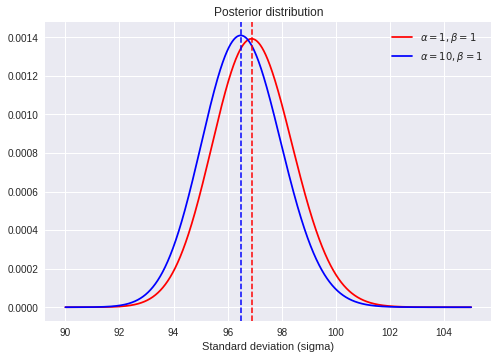

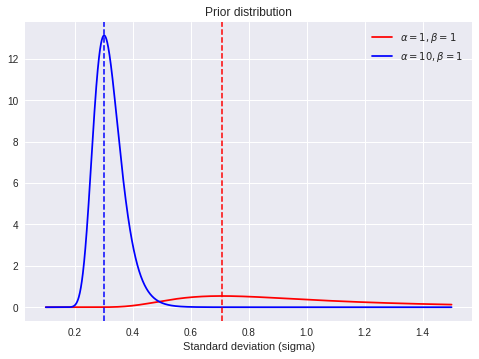

In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt


def invgamma(sigma, a, b):
    """
    Returns the inverse-gamma distribution for the standard deviations (sigma).
    @param sigma: either a number or a numpy array representing the standard deviation(s).
    @param a: the value of the 1st parameter in the inverse-gamma dsitribution.
    @param b: the value of the 2nd parameter in the inverse-gamma distribution.
    """
    ### Compute the terms A, B, C, D (as described in the answer above).
    A = a * math.log(b)
    B = np.sum([math.log(i) for i in range(1, a)])
    C = (2*a + 2) * np.log(sigma)
    D = b / np.square(sigma)
    
    ### Compute and return the probability density.
    return np.exp(A - B - C - D)

  
def posterior(sigma, data, alpha, beta):
    """
    Returns the posterior distribution for the standard deviations (sigma). 
    Returns also the value of sigma where the peak density occurs. 
    @param sigma: either a number or a numpy array representing the standard deviation(s).
    @param data: dataset where only the first 2 dimensions will be used. 
    @param alpha: alpha value for the PRIOR distribution.
    @param beta: beta value for the PRIOR distribution.
    """
    X = data[:,0:2]
    n, p = X.shape
    
    ### Compute alpha1 and beta1 for the posterior, using the dataset.
    mu = np.sum(X, axis=0) / n
    beta1 = np.sum(np.square(X - mu)) / 2 + beta
    alpha1 = alpha + n
    
    ### Compute the value of sigma where the peak occurs
    peak = np.sum(np.square(X - mu)) + 2*beta
    peak = peak / 2 / (alpha + n + 1)
    peak = math.sqrt(peak)
    
    ### Return the results.
    return invgamma(sigma, alpha1, beta1), peak


def prior(sigma, alpha, beta):
    """
    Returns the prior distribution for the standard deviations (sigma). 
    Returns also the value of sigma where the peak density occurs. 
    @param sigma: either a number or a numpy array representing the standard deviation(s).
    @param alpha: alpha value for the PRIOR distribution.
    @param beta: beta value for the PRIOR distribution.
    """
    peak = math.sqrt(beta/(alpha+1))
    return invgamma(sigma, alpha, beta), peak
    
    
def myplot2(data = None):
    if(data is None):
        sigma = np.linspace(0.1, 1.5, num=2000)
        pA, peakA = prior(sigma, 1, 1)  # Model A
        pB, peakB = prior(sigma, 10, 1) # Model B
        plt.title("Prior distribution")
    else:
        sigma = np.linspace(90, 105, num=2000)
        pA, peakA = posterior(sigma, data, 1, 1)  # Model A
        pB, peakB = posterior(sigma, data, 10, 1) # Model B
        plt.title("Posterior distribution")
    plt.plot(sigma, pA, color="r", label=r'$\alpha = 1, \beta = 1$')
    plt.plot(sigma, pB, color="b", label=r'$\alpha = 10, \beta = 1$')    
    plt.axvline(x=peakA, color='r', linestyle='--', linewidth=1.5)
    plt.axvline(x=peakB, color='b', linestyle='--', linewidth=1.5)
    plt.xlabel("Standard deviation (sigma)")
    plt.legend()
    plt.show()
    
### Uncomment to download the file containing the data
#!pip install -q wget
#import wget
#wget.download("http://www.cse.chalmers.se/research/lab/mlcourse/hw0/dataset0.txt")

### Import the dataset and plot (one for prior and one for posterior)
data = np.loadtxt("./dataset0.txt")
myplot2(data)
myplot2()